**Data Cleaning and Preparation**



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as sts
# Adding Data Sets and concatenating and joining them on the station ID
Q1 = pd.read_csv('/content/drive/MyDrive/Programming Assignment/Divvy_Trips_2017_Q1.csv')
Q1['Quarter'] = 'Q1'
Q2 = pd.read_csv('/content/drive/MyDrive/Programming Assignment/Divvy_Trips_2017_Q2.csv')
Q2['Quarter'] = 'Q2'
Stations = pd.read_csv('/content/drive/MyDrive/Programming Assignment/Divvy_Stations_2017_Q1Q2.csv')
frames = [Q1, Q2]
Quarters = pd.concat(frames)
# Left join on from_station
Quarters = Quarters.merge(Stations, left_on = 'from_station_id', right_on = 'id', how = 'left')
# Renaming from_stations columns
Quarters.rename(columns={'city': 'from_city', 'latitude': 'from_latitude', 'longitude': 'from_longitude', 'dpcapacity': 'from_dpcapacity', 'online_date': 'from_online_date'},inplace=True)
# Left join on to_station
Quarters = Quarters.merge(Stations, left_on = 'to_station_id', right_on = 'id', how = 'left')
# Renaming to_stations columns
Quarters.rename(columns={'city': 'to_city', 'latitude': 'to_latitude', 'longitude': 'to_longitude', 'dpcapacity': 'to_dpcapacity', 'online_date': 'to_online_date'},inplace=True)
# Dropping id and name of station columns
Quarters.drop(['id_x', 'id_y', 'name_x', 'name_y'], axis = 1, inplace = True)
# Filling NaN values with suitable ones to wrangle the data
Quarters['gender'].fillna('Prefer not to say', inplace = True)
# Missing as well as wrong/impossible values for the birthyear cannot be changed as the missingness is due to the observed data, which cannot be fixed
Quarters['birthyear'].fillna('Null', inplace = True)
# To drop duplicates in the final dataset
Quarters.drop_duplicates(inplace = True)
# To check if duplicates have been removed
len(Quarters['trip_id']) == len(set(Quarters['trip_id']))
# Trim White Spaces in city data
Quarters['from_city'] = Quarters['from_city'].str.strip()
Quarters['to_city'] = Quarters['to_city'].str.strip()

In [4]:
# Converting tripduration from seconds to minutes
Quarters['tripduration'] = Quarters['tripduration']/60
Quarters.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,...,from_city,from_latitude,from_longitude,from_dpcapacity,from_online_date,to_city,to_latitude,to_longitude,to_dpcapacity,to_online_date
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,14.283333,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,...,Chicago,41.885637,-87.641823,23,6/25/2013 12:21:32,Chicago,41.855136,-87.654127,11,7/19/2013 11:05:15
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,3.933333,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,...,Chicago,41.890912,-87.626804,15,8/8/2013 12:26:15,Chicago,41.891020,-87.617300,31,6/22/2013 20:28:13
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,5.800000,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,...,Chicago,42.015962,-87.668570,23,5/24/2016 15:41:28,Chicago,42.009074,-87.674190,19,2/2/2015 11:32:22
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,4.800000,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,...,Chicago,41.893992,-87.629318,23,7/18/2013 16:46:48,Chicago,41.894503,-87.617854,31,7/18/2013 22:58:19
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,6.916667,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,...,Chicago,41.921540,-87.653818,19,9/23/2013 15:05:38,Chicago,41.908537,-87.648627,20,9/25/2013 13:55:21


**Exploratory Data Analysis**

*Trip Duration Analysis*

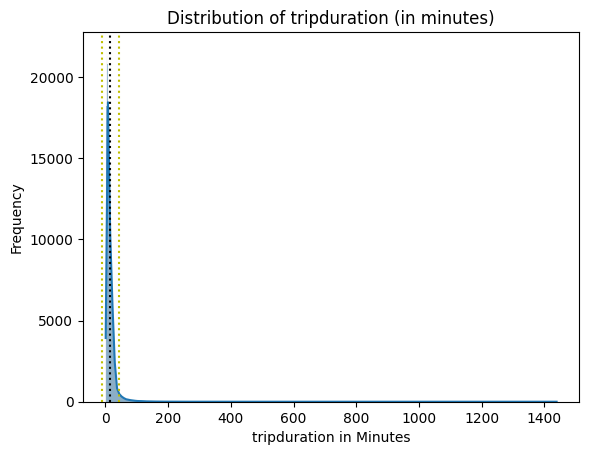

In [11]:
# Distribution of tripduration in minutes
import statistics as st

m = st.mean(Quarters['tripduration'])
sd = st.stdev(Quarters['tripduration'])

sns.histplot(data = Quarters, x = 'tripduration', kde = True, alpha = 0.4)
plt.xlabel('tripduration in Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of tripduration (in minutes)')
plt.axvline(m, color= 'k' , linestyle=":")
plt.axvline(m+sd, color= 'y' , linestyle=":")
plt.axvline(m-sd, color= 'y' , linestyle=":")
plt.show()

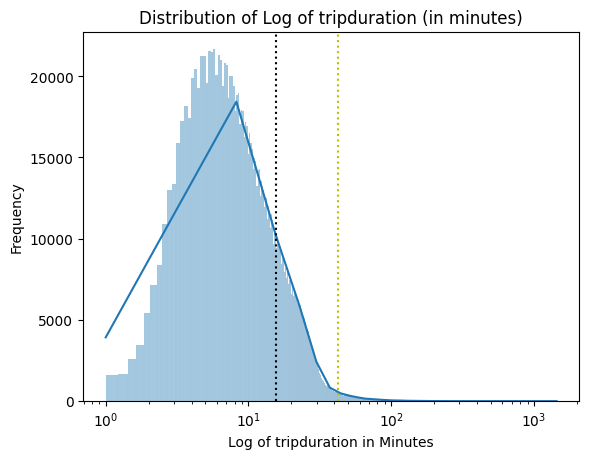

count    1551494.00000
mean          15.66293
std           26.96178
min            1.00000
25%            6.53333
50%           11.16667
75%           18.78333
max         1438.96667
Name: tripduration, dtype: object

In [5]:
# Distribution of Log of tripduration in minutes
import statistics as st

m = st.mean(Quarters['tripduration'])
sd = st.stdev(Quarters['tripduration'])

sns.histplot(data = Quarters, x = 'tripduration', kde = True, alpha = 0.4)
plt.xscale('log')
plt.xlabel('Log of tripduration in Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Log of tripduration (in minutes)')
plt.axvline(m, color= 'k' , linestyle=":")
plt.axvline(m+sd, color= 'y' , linestyle=":")
plt.axvline(m-sd, color= 'y' , linestyle=":")
plt.show()

Quarters['tripduration'].describe().apply("{0:.5f}".format)

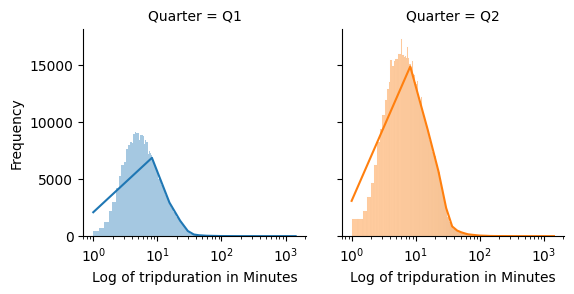

In [14]:
## Quarter Wise Distribution of Log of tripduration in minutes

plot = sns.FacetGrid(data = Quarters, col = 'Quarter', hue = 'Quarter')
plot.map(sns.histplot, 'tripduration', kde = True, alpha = 0.4)
plt.xscale('log')
plot.set_axis_labels("Log of tripduration in Minutes", "Frequency")
plt.show()

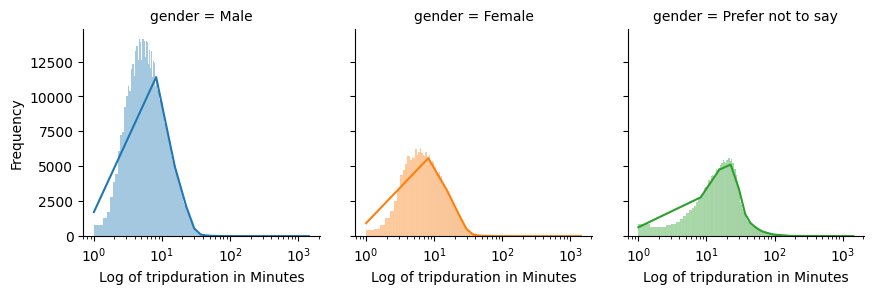

In [15]:
## Gender Wise Distribution of Log of tripduration in minutes

plot = sns.FacetGrid(data = Quarters, col = 'gender', hue = 'gender')
plot.map(sns.histplot, 'tripduration', kde = True, alpha = 0.4)
plt.xscale('log')
plot.set_axis_labels("Log of tripduration in Minutes", "Frequency")
plt.show()

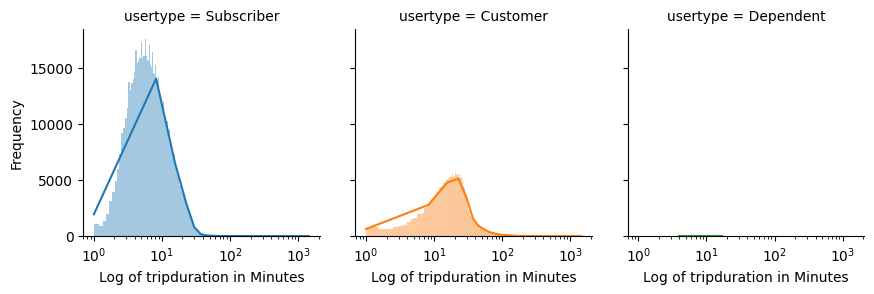

In [16]:
## User Type Wise Distribution of Log of tripduration in minutes

plot = sns.FacetGrid(data = Quarters, col = 'usertype', hue = 'usertype')
plot.map(sns.histplot, 'tripduration', kde = True, alpha = 0.4)
plt.xscale('log')
plot.set_axis_labels("Log of tripduration in Minutes", "Frequency")
plt.show()

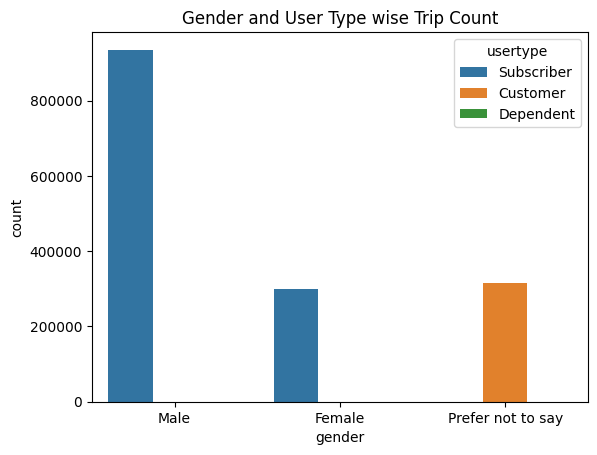

In [49]:
## How many trips have people of different genders taken belonging to different usertypes
sns.countplot(data = Quarters, x = 'gender', hue = 'usertype')
plt.title('Gender and User Type wise Trip Count')
plt.show()

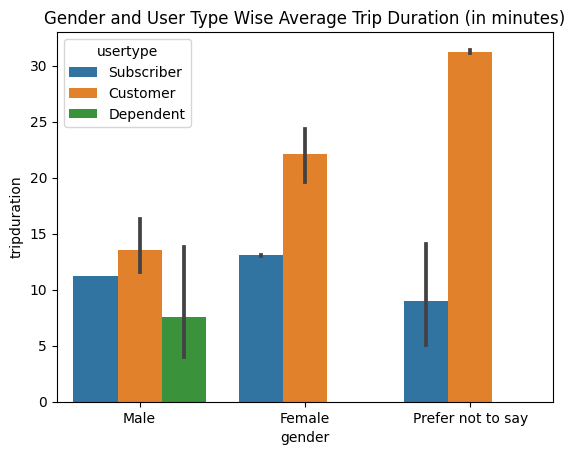

In [50]:
## Average Trip Duration for each Gender and User Type
sns.barplot(data= Quarters, x='gender', y='tripduration', hue='usertype')
plt.title('Gender and User Type Wise Average Trip Duration (in minutes)')
plt.show()

In [13]:
# Gender Wise tripduration Averages
grouped = Quarters.groupby(['gender'])

gender_wise = grouped['tripduration'].describe()
gender_wise

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,298784.0,13.061055,19.003230,1.0,6.645833,10.800000,16.833333,1429.700000
Male,935854.0,11.217717,16.481142,1.0,5.633333,9.016667,14.350000,1434.933333
Prefer not to say,316856.0,31.245627,45.925094,1.0,15.450000,22.983333,32.700000,1438.966667


In [18]:
# User Type Wise tripduration Averages
grouped1 = Quarters.groupby(['usertype'])

user_type_wise = grouped1['tripduration'].describe()
user_type_wise

,count,mean,std,min,25%,50%,75%,max
usertype,,,,,,,,
Customer,317151.0,31.233105,45.909850,1.00,15.450000,22.966667,32.683333,1438.966667
Dependent,4.0,7.570833,6.365989,3.95,4.037500,4.625000,8.158333,17.083333
Subscriber,1234339.0,11.662358,17.142634,1.00,5.833333,9.416667,14.966667,1434.933333


In [45]:
# Quarter Wise tripduration Averages
grouped1 = Quarters.groupby(['Quarter'])

user_type_wise = grouped1['tripduration'].describe()
user_type_wise

,count,mean,std,min,25%,50%,75%,max
Quarter,,,,,,,,
Q1,431691.0,12.377331,25.249064,1.0,5.466667,8.916667,14.766667,1438.966667
Q2,1119803.0,16.929550,27.489004,1.0,7.133333,12.233333,20.250000,1437.066667


*Station Wise Analysis*

In [14]:

# Station with maximum number of trips starting from it
grouped2 = Quarters.groupby(['from_station_name'])

from_station_wise_max_trips = grouped2['gender'].count()
from_station_wise_max_trips.idxmax()
# from_station_wise_max_trips['Streeter Dr & Grand Ave']
# from_station_wise_max_trips['Field Museum']

'Streeter Dr & Grand Ave'

In [20]:
# Station with maximum dpcapacity (starting point)
grouped3 = Quarters.groupby(['from_station_name'])

from_station_max_capacity = grouped3['from_dpcapacity'].max()
# from_station_max_capacity['Streeter Dr & Grand Ave']
# from_station_max_capacity['Field Museum']
from_station_max_capacity.idxmax()

'Field Museum'

In [21]:
# Station with minimum dpcapacity (starting point)
grouped4 = Quarters.groupby(['from_station_name'])

from_station_min_capacity = grouped4['from_dpcapacity'].min()
from_station_min_capacity.idxmin()

'California Ave & Cortez St'

In [22]:
# Station with maximum dpcapacity (ending point)
grouped5 = Quarters.groupby(['to_station_name'])

to_station_max_capacity = grouped5['to_dpcapacity'].max()
to_station_max_capacity.idxmax()

'Field Museum'

In [23]:
# Station with minimum dpcapacity (ending point)
grouped6 = Quarters.groupby(['to_station_name'])

to_station_min_capacity = grouped6['to_dpcapacity'].min()
to_station_min_capacity.idxmin()

'California Ave & Cortez St'

In [24]:
# Station with maximum average tripduration (starting point)
grouped7 = Quarters.groupby(['from_station_name'])

from_station_max_avg_duration = grouped7['tripduration'].describe()
from_station_max_avg_duration['mean'].idxmax()

'Cicero Ave & Lake St'

In [25]:
# Station with maximum number of trips ending in it
grouped8 = Quarters.groupby(['to_station_name'])

to_station_max_trip = grouped8['tripduration'].describe()
# to_station_max_trip
to_station_max_trip['count'].idxmax()

'Streeter Dr & Grand Ave'

In [26]:
# Station with maximum average tripduration (ending point)
grouped9 = Quarters.groupby(['to_station_name'])

to_station_max_avg_duration = grouped9['tripduration'].describe()
# to_station_max_avg_duration
to_station_max_avg_duration['mean'].idxmax()

'Wabash Ave & 87th St'

In [27]:
# Station with minimum number of trips starting from it
grouped_10 = Quarters.groupby(['from_station_name'])

from_station_min_trip = grouped_10['tripduration'].describe()
# from_station_min_trip
from_station_min_trip['count'].idxmin()

'Ashland Ave & Garfield Blvd'

In [28]:
# Station with minimun number of trips ending in it
grouped_11 = Quarters.groupby(['to_station_name'])

to_station_min_trip = grouped_11['tripduration'].describe()
# to_station_min_trip
to_station_min_trip['count'].idxmin()

'State St & 76th St'

*Quarter Wise Analysis*

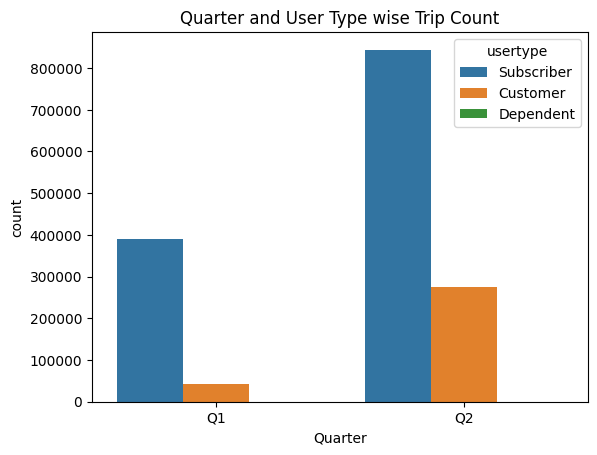

In [30]:
## How many trips have people of different usertypes taken in each Quarter
sns.countplot(data = Quarters, x = 'Quarter', hue = 'usertype')
plt.title('Quarter and User Type wise Trip Count')
plt.show()

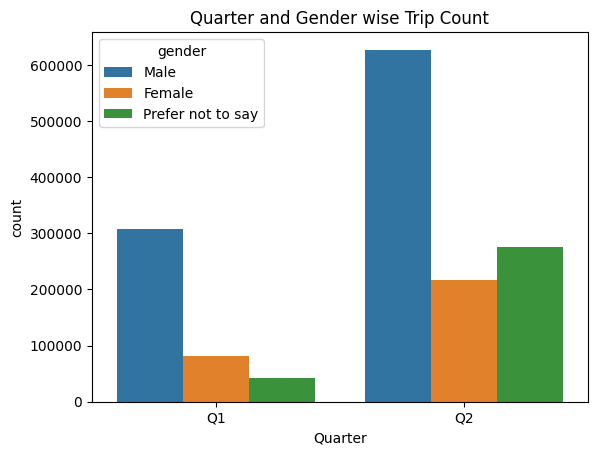

In [31]:
## How many trips have people of different usertypes taken in each Quarter
sns.countplot(data = Quarters, x = 'Quarter', hue = 'gender')
plt.title('Quarter and Gender wise Trip Count')
plt.show()

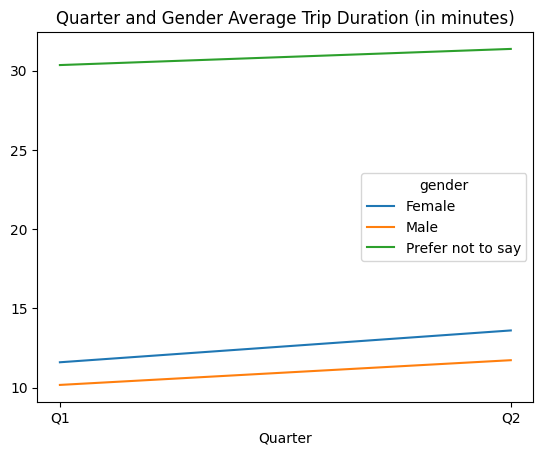

In [32]:
## Average Trip Duration of different usertypes taken in each Quarter
df = Quarters.groupby(['Quarter','gender'])
df1 = df['tripduration'].mean()
sns.lineplot(data = df1, x = 'Quarter', y = df1.values, hue = 'gender')
plt.title('Quarter and Gender Average Trip Duration (in minutes)')
plt.show()

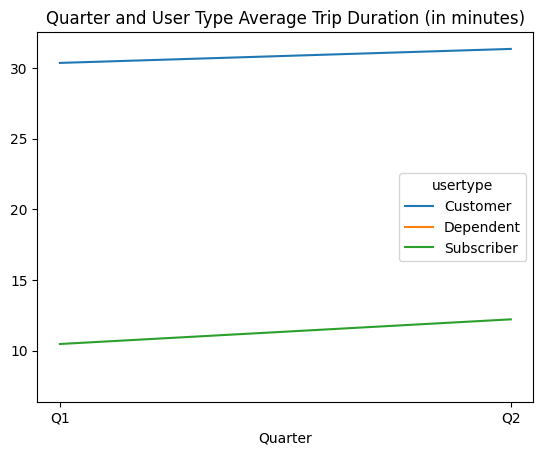

In [33]:
## Average Trip Duration of different usertypes taken in each Quarter
df2 = Quarters.groupby(['Quarter','usertype'])
df3 = df2['tripduration'].mean()
sns.lineplot(data = df3, x = 'Quarter', y = df3.values, hue = 'usertype')
plt.title('Quarter and User Type Average Trip Duration (in minutes)')
plt.show()

*Bike Wise Analysis*

In [35]:
# Bike data for maximum sum of tripduration
grouped_12 = Quarters.groupby(['bikeid'])

bike_max_duration = grouped_12['tripduration'].sum()
pd.DataFrame(bike_max_duration)

,tripduration
bikeid,
1,2377.066667
2,4169.066667
3,693.016667
4,2241.050000
5,3802.766667
...,...
5916,4539.033333
5917,6060.416667
5918,6889.716667


In [36]:
bike_max_duration.idxmax()

5880

In [37]:
# Bike data for maximum number of total trips
grouped_13 = Quarters.groupby(['bikeid'])

bike_max_trips = grouped_13['trip_id'].count()
pd.DataFrame(bike_max_trips)

,trip_id
bikeid,
1,187
2,247
3,45
4,105
5,277
...,...
5916,317
5917,371
5918,388


In [38]:
bike_max_trips.idxmax()

2565

*City Wise Analysis*

In [39]:
# City data for total number of stations (starting point)
grouped_14 = Quarters.groupby(['from_city'])

from_city_stations = grouped_14['from_station_id'].nunique()
pd.DataFrame(from_city_stations)

,from_station_id
from_city,
Chicago,559
Evanston,10
Oak Park,13


In [40]:
# City data for maximum number of total trips (starting point)
grouped_15 = Quarters.groupby(['from_city'])

from_city_max_trips = grouped_15['trip_id'].count()
pd.DataFrame(from_city_max_trips)

# We can clearly see Chicago has the most amount of trips also because it has the most amount of stations in it (almost 50x more stations)

,trip_id
from_city,
Chicago,1537447
Evanston,8896
Oak Park,5151


In [6]:
# Heat Map for Stations with most usage (Starting Point)
import folium
from folium.plugins import HeatMap
grouped_19 = Quarters.groupby(['from_latitude','from_longitude'])

lat_lon = grouped_19['trip_id'].count().reset_index()
geodata = pd.DataFrame(lat_lon)
mean_latitude =  sts.mean(geodata['from_latitude'])
mean_longitude =  sts.mean(geodata['from_longitude'])
m = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=5)
HeatMap(geodata).add_to(m)
m

In [8]:
# Heat Map for Stations with most usage (Ending Point)
import folium
from folium.plugins import HeatMap
grouped_21 = Quarters.groupby(['to_latitude','to_longitude'])

lat_lon2 = grouped_21['trip_id'].count().reset_index()
geodata2 = pd.DataFrame(lat_lon2)
mean_latitude2 =  sts.mean(geodata2['to_latitude'])
mean_longitude2 =  sts.mean(geodata2['to_longitude'])
m2 = folium.Map(location=[mean_latitude2, mean_longitude2], zoom_start=5)
HeatMap(geodata).add_to(m2)
m2

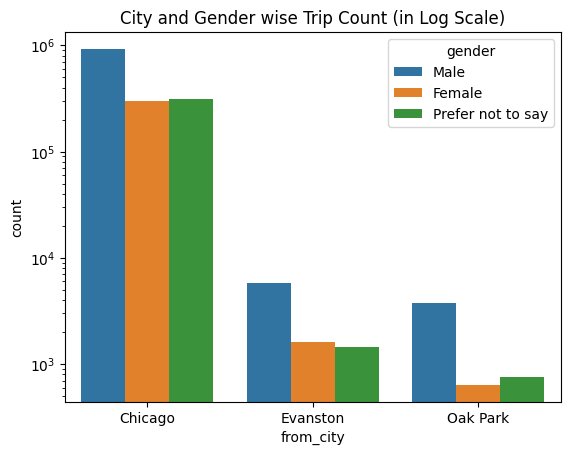

In [43]:
## How many trips have people of different usertypes taken in each City (Starting Point)
sns.countplot(data = Quarters, x = 'from_city', hue = 'gender')
plt.yscale('log')
plt.title('City and Gender wise Trip Count (in Log Scale)')
plt.show()

# Showing it is male dominated and alot of people have chosen not to fill their gender as well as "Prefer not to say" value is higher than female in Chicago which is the one with most usage
# from_city and to_city will almost always be same so have only taken from_city to take out city wise data

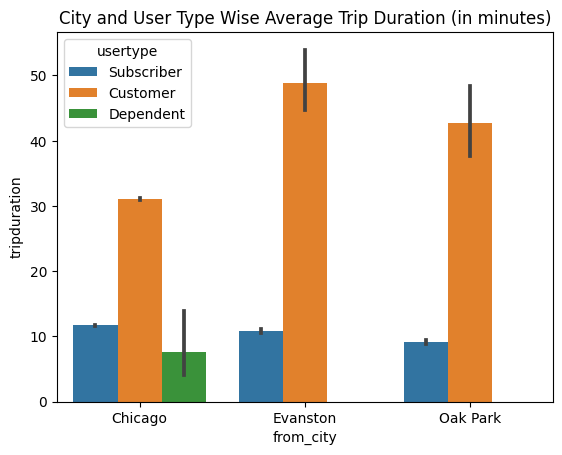

In [44]:
## Average Trip Duration for each City and User Type
sns.barplot(data= Quarters, x='from_city', y='tripduration', hue='usertype')
plt.title('City and User Type Wise Average Trip Duration (in minutes)')
plt.show()